In [1]:
import os
import re
import shutil
import string
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
print(tf.__version__)

2.6.0-dev20210510


In [3]:
# Downloading and exploring the IMDB dataset
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'
dataset = tf.keras.utils.get_file(
                'stack_overflow_16k.tar.gz',
                data_url,
                untar=True,
                cache_dir='stack_overflow',
                cache_subdir='.')
dataset_dir = pathlib.Path(dataset).parent

In [4]:
os.listdir(dataset_dir)

['README.md', 'stack_overflow_16k.tar.gz.tar.gz', 'test', 'train']

In [5]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[WindowsPath('/tmp/.keras/train/csharp'),
 WindowsPath('/tmp/.keras/train/java'),
 WindowsPath('/tmp/.keras/train/javascript'),
 WindowsPath('/tmp/.keras/train/python')]

In [6]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['csharp', 'java', 'javascript', 'python']

In [7]:
sample_file = os.path.join(train_dir, 'python/1755.txt')
with open(sample_file) as f:
    print(f.read())

why does this blank program print true x=true.def stupid():.    x=false.stupid().print x



In [8]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [9]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(10):
        print("Question: ", text_batch.numpy()[i])
        print("Label:", label_batch.numpy()[i])

Question:  b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default con

In [10]:
for i, label in enumerate(raw_train_ds.class_names):
    print("Label", i, "corresponds to", label)

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


In [11]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [12]:
test_dir = dataset_dir/'test'
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir, batch_size=batch_size)

Found 8000 files belonging to 4 classes.


In [13]:
VOCAB_SIZE = 10000

binary_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='binary')

MAX_SEQUENCE_LENGTH = 250

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)


In [14]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)
int_vectorize_layer.adapt(train_text)

In [15]:
def binary_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return binary_vectorize_layer(text), label
def int_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return int_vectorize_layer(text), label

In [16]:
# Retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", first_label)

Question tf.Tensor(b'"what is the difference between these two ways to create an element? var a = document.createelement(\'div\');..a.id = ""mydiv"";...and..var a = document.createelement(\'div\').id = ""mydiv"";...what is the difference between them such that the first one works and the second one doesn\'t?"\n', shape=(), dtype=string)
Label tf.Tensor(2, shape=(), dtype=int32)


In [17]:
print("'binary' vectorized question:", 
      binary_vectorize_text(first_question, first_label)[0])
print("'int' vectorized question:",
      int_vectorize_text(first_question, first_label)[0])
print("1289 ---> ", int_vectorize_layer.get_vocabulary()[1289])
print("313 ---> ", int_vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))

'binary' vectorized question: tf.Tensor([[1. 1. 0. ... 0. 0. 0.]], shape=(1, 10000), dtype=float32)
'int' vectorized question: tf.Tensor(
[[ 55   6   2 410 211 229 121 895   4 124  32 245  43   5   1   1   5   1
    1   6   2 410 211 191 318  14   2  98  71 188   8   2 199  71 178   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   

In [18]:
binary_train_ds = raw_train_ds.map(binary_vectorize_text)
binary_val_ds = raw_val_ds.map(binary_vectorize_text)
binary_test_ds = raw_test_ds.map(binary_vectorize_text)

int_train_ds = raw_train_ds.map(int_vectorize_text)
int_val_ds = raw_val_ds.map(int_vectorize_text)
int_test_ds = raw_test_ds.map(int_vectorize_text)

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

def configure_dataset(dataset):
    return dataset.cache().prefetch(buffer_size=AUTOTUNE)

binary_train_ds = configure_dataset(binary_train_ds)
binary_val_ds = configure_dataset(binary_val_ds)
binary_test_ds = configure_dataset(binary_test_ds)

int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)

In [20]:
binary_model = tf.keras.Sequential([layers.Dense(4)])
binary_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
history = binary_model.fit(
    binary_train_ds, validation_data=binary_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 7s 33ms/step - loss: 1.1201 - accuracy: 0.6403 - val_loss: 0.9171 - val_accuracy: 0.7769
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7796 - accuracy: 0.8198 - val_loss: 0.7526 - val_accuracy: 0.7950
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6280 - accuracy: 0.8608 - val_loss: 0.6667 - val_accuracy: 0.8100
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5345 - accuracy: 0.8867 - val_loss: 0.6131 - val_accuracy: 0.8244
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.9033 - val_loss: 0.5763 - val_accuracy: 0.8313
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.9178 - val_loss: 0.5496 - val_accuracy: 0.8344
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3779 - accuracy: 0.9287 - val_loss: 0.5294 - val_accuracy: 0.8369
Epoch

In [21]:
# Creating a plot of accuracy and loss over time
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

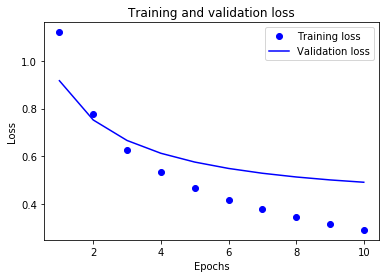

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

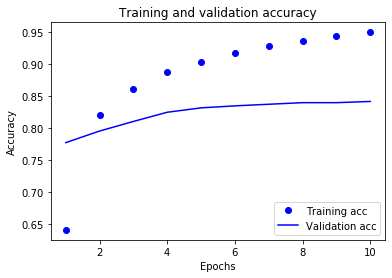

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [24]:
def create_model(vocab_size, num_labels):
    model = tf.keras.Sequential([
      layers.Embedding(vocab_size, 64, mask_zero=True),
      layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      layers.GlobalMaxPooling1D(),
      layers.Dense(num_labels)
  ])
    return model

# vocab_size is VOCAB_SIZE + 1 since 0 is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=4)
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)

Epoch 1/5
200/200 [==============================] - 12s 56ms/step - loss: 1.1478 - accuracy: 0.5061 - val_loss: 0.7613 - val_accuracy: 0.6944
Epoch 2/5
200/200 [==============================] - 6s 32ms/step - loss: 0.6197 - accuracy: 0.7598 - val_loss: 0.5345 - val_accuracy: 0.7994
Epoch 3/5
200/200 [==============================] - 7s 33ms/step - loss: 0.3648 - accuracy: 0.8845 - val_loss: 0.4644 - val_accuracy: 0.8206
Epoch 4/5
200/200 [==============================] - 7s 36ms/step - loss: 0.2021 - accuracy: 0.9519 - val_loss: 0.4575 - val_accuracy: 0.8194
Epoch 5/5
200/200 [==============================] - 7s 34ms/step - loss: 0.1009 - accuracy: 0.9837 - val_loss: 0.4826 - val_accuracy: 0.8194


In [25]:
print("Linear model on binary vectorized data:")
print(binary_model.summary())

Linear model on binary vectorized data:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40004     
Total params: 40,004
Trainable params: 40,004
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
print("ConvNet model on int vectorized data:")
print(int_model.summary())

ConvNet model on int vectorized data:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640064    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          20544     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 660,868
Trainable params: 660,868
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Evaluating the model
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_ds)
int_loss, int_accuracy = int_model.evaluate(int_test_ds)

print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))

250/250 [==============================] - 8s 32ms/step - loss: 0.5112 - accuracy: 0.8170
Binary model accuracy: 81.46%
Int model accuracy: 81.70%


In [28]:
# Creating a plot of accuracy and loss over time
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

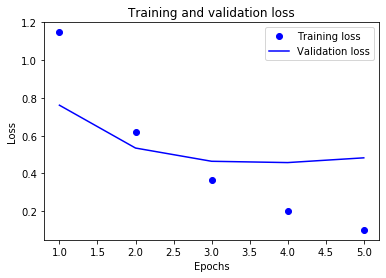

In [29]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

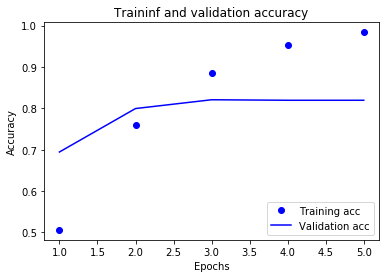

In [30]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traininf and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
export_model = tf.keras.Sequential(
    [binary_vectorize_layer, binary_model,
     layers.Activation('sigmoid')])

export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print("Accuracy: {:2.2%}".format(binary_accuracy))

250/250 [==============================] - 9s 32ms/step - loss: 0.5181 - accuracy: 0.8146 1s - l
Accuracy: 81.46%


In [33]:
# Inferencing on new data
def get_string_labels(predicted_scores_batch):
    predicted_int_labels = tf.argmax(predicted_scores_batch, axis=1)
    predicted_labels = tf.gather(raw_train_ds.class_names, predicted_int_labels)
    return predicted_labels

inputs = [
    "how do I extract keys from a dict into a list?",  # python
    "debug public static void main(string[] args) {...}",  # java
]
predicted_scores = export_model.predict(inputs)
predicted_labels = get_string_labels(predicted_scores)
for input, label in zip(inputs, predicted_labels):
    print("Question: ", input)
    print("Predicted label: ", label.numpy())

Question:  how do I extract keys from a dict into a list?
Predicted label:  b'python'
Question:  debug public static void main(string[] args) {...}
Predicted label:  b'java'
